<a href="https://colab.research.google.com/github/Aritra-3-Roy/Image-Classification-using-ANN/blob/main/Image_Classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [16]:
# Load dataset
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
# Normalizing the data in the form of 0 and 1
x_train,x_test = x_train/255.0,x_test/255.0;
print("X_train shape",x_train.shape)

X_train shape (60000, 28, 28)


In [17]:
# Build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])
#This line initializes a Sequential model, which is a linear stack of layers. In Keras, the Sequential model is used when you want to create a model layer by layer, where each layer has exactly one input tensor and one output tensor.
#The Flatten layer is used to convert the 2D input (in this case, images of size 28x28 pixels) into a 1D array. This is necessary because the subsequent layers (Dense layers) expect a 1D input. The input_shape parameter specifies the shape of the input data, which is 28x28 pixels for grayscale images (like those in the MNIST dataset).
#The Dense layer is a fully connected layer. This particular layer has 128 neurons (or units) and uses the ReLU (Rectified Linear Unit) activation function. The ReLU function introduces non-linearity into the model, allowing it to learn complex patterns. Each neuron in this layer receives input from all the neurons in the previous layer (the Flatten layer).
#The Dropout layer is a regularization technique used to prevent overfitting. During training, it randomly sets a fraction (in this case, 20% or 0.2) of the input units to 0 at each update, which helps to make the model more robust by preventing it from relying too heavily on any one feature.
#This is another Dense layer, but it has 10 neurons, which corresponds to the number of classes in the classification problem (for example, digits 0-9 in the MNIST dataset). The softmax activation function is used here to convert the output into probabilities that sum to 1, making it suitable for multi-class classification tasks. Each output neuron represents the probability of the input belonging to one of the 10 classes.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
#Train model
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8562 - loss: 0.4867 - val_accuracy: 0.9582 - val_loss: 0.1390
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9551 - loss: 0.1548 - val_accuracy: 0.9703 - val_loss: 0.0951
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9665 - loss: 0.1114 - val_accuracy: 0.9704 - val_loss: 0.0917
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9722 - loss: 0.0884 - val_accuracy: 0.9747 - val_loss: 0.0802
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9773 - loss: 0.0723 - val_accuracy: 0.9775 - val_loss: 0.0745
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9817 - loss: 0.0585 - val_accuracy: 0.9790 - val_loss: 0.0669
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9818 - loss: 0.0567 - val_accuracy: 0.9775 - val_loss: 0.0758
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9825 - loss: 0.0521 

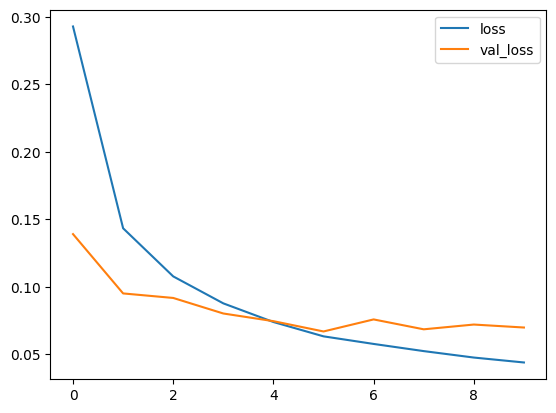

In [20]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

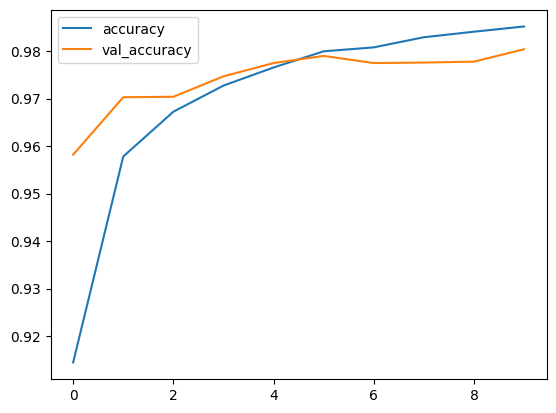

In [21]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [22]:
# Evaluate the model
print(model.evaluate(x_test,y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.0842
[0.06980058550834656, 0.980400025844574]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization
[[ 969    0    3    0    0    0    4    1    3    0]
 [   0 1124    3    0    0    0    2    1    5    0]
 [   1    2 1013    2    2    0    1    4    6    1]
 [   0    0    6  989    0    3    0    5    3    4]
 [   0    0    7    0  961    0    5    1    3    5]
 [   1    0    0    9    1  870    3    1    6    1]
 [   3    2    3    1    2    2  943    0    2    0]
 [   1    4    9    1    0    0    0 1005    3    5]
 [   1    1    4    2    5    2    1    3  954    1]
 [   2    2    0    3   11    1    0   10    4  976]]


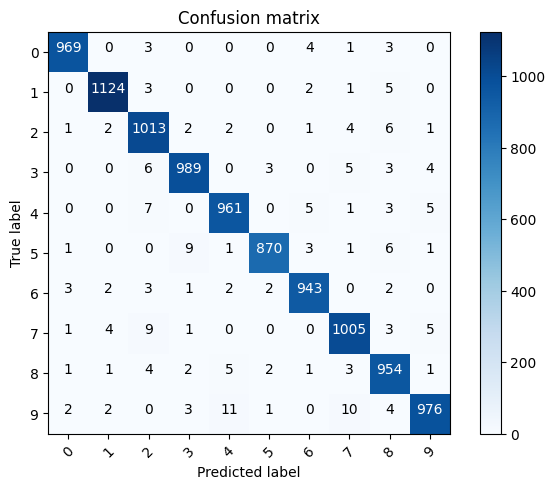

In [23]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


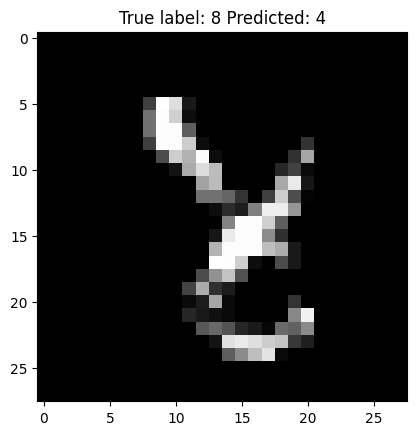

In [24]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
